In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read xlsx file
df = pd.read_excel('Data_Train.xlsx', sheet_name='Sheet1')

# Save as CSV
df.to_csv('Data_Train.csv', index=False)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [17]:
df.info() # Check data types and missing values
df.describe().T # Check summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [18]:
 # Remove any rows with missing values
df.dropna(inplace=True)

In [19]:
# Convert the 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

 # Extract day, month, and year from 'Date_of_Journey' column
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

 # Extract hours and minutes from 'Dep_Time' column
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

 # Extract hours and minutes from 'Arrival_Time' column
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

 # Remove the original 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' columns
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [20]:
# Convert 'Duration' column to hours and minutes
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i].strip()
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))
df['Duration_Hours'] = duration_hours
df['Duration_Minutes'] = duration_minutes
df.drop('Duration', axis=1, inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [21]:
df['Total_Stops'].value_counts(),'------',df['Additional_Info'].value_counts()

# Remove 'Additional_Info' column
df.drop('Additional_Info', axis=1, inplace=True)

In [22]:
df['Airline'].value_counts(),'------',df['Source'].value_counts(),'------',df['Destination'].value_counts()

#split Route 
#df[['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6']] = df['Route'].str.split('→', expand=True)

# Remove the original 'Route' column
df.drop('Route', axis=1, inplace=True)

df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0


### Univariate

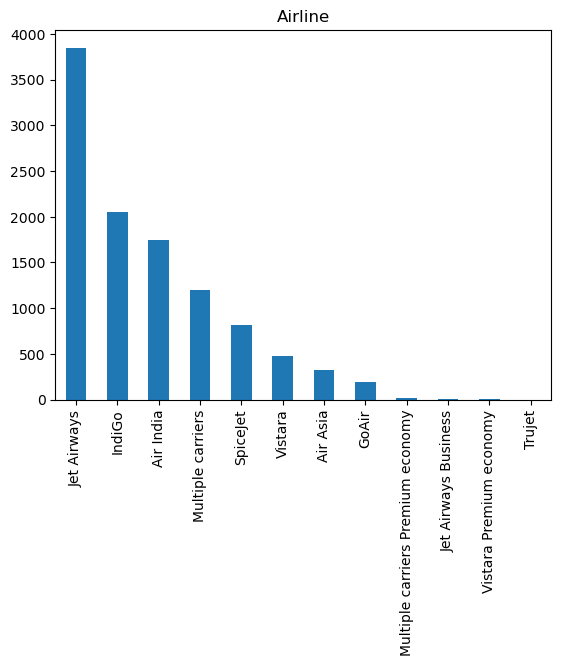

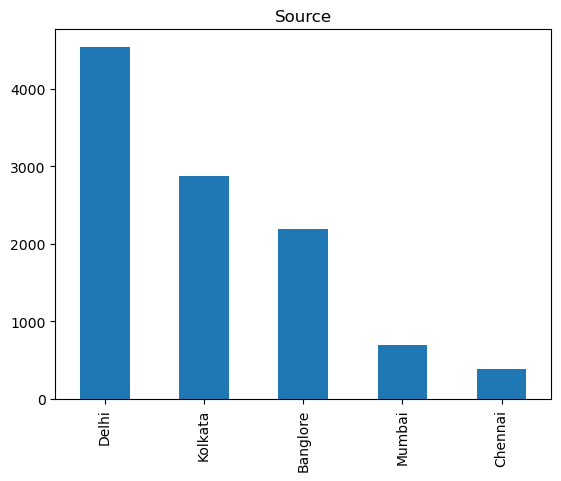

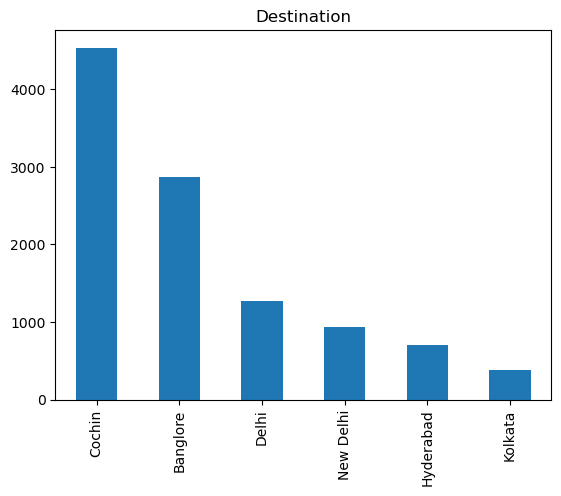

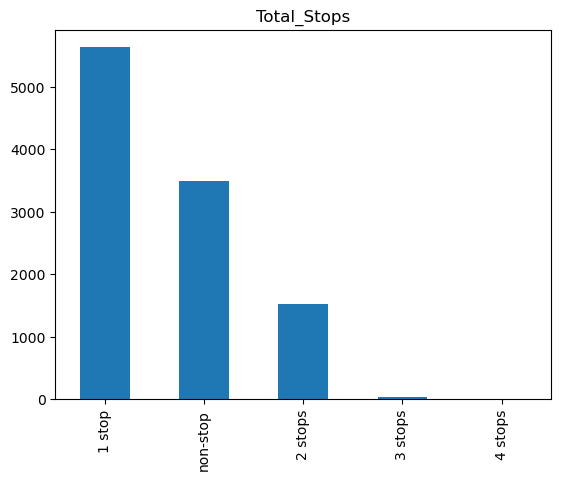

In [26]:
# Check unique values for each categorical feature
categorical_features = ['Airline', 'Source', 'Destination', 'Total_Stops']
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()
    

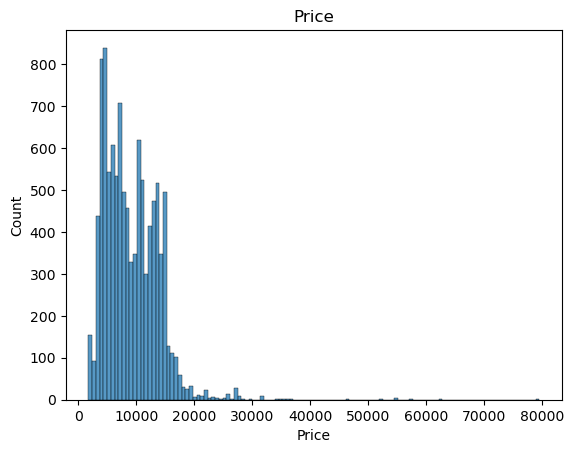

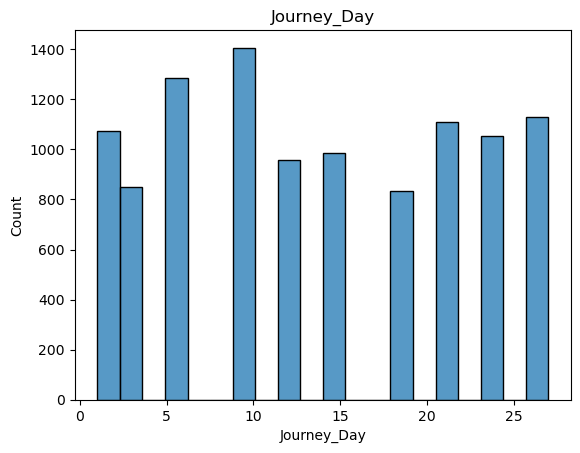

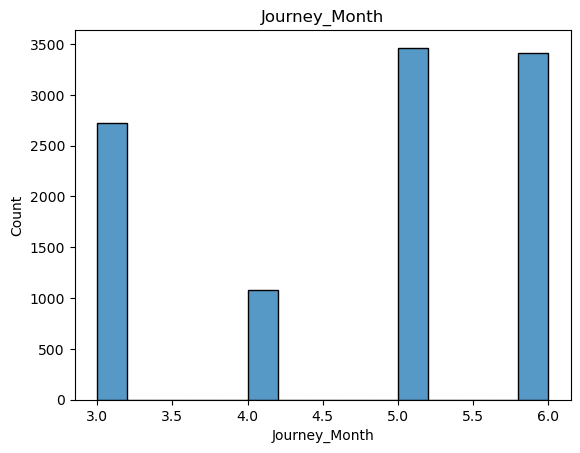

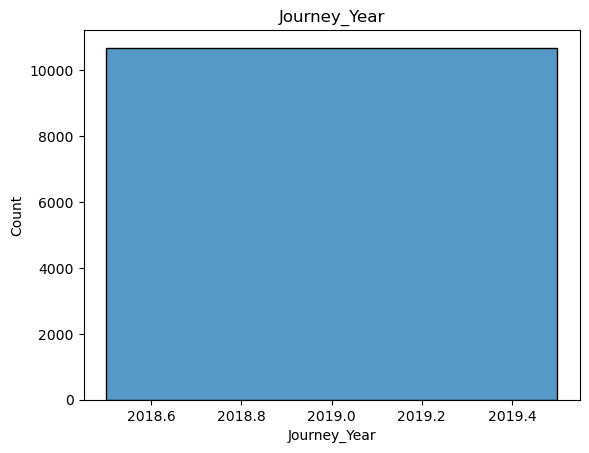

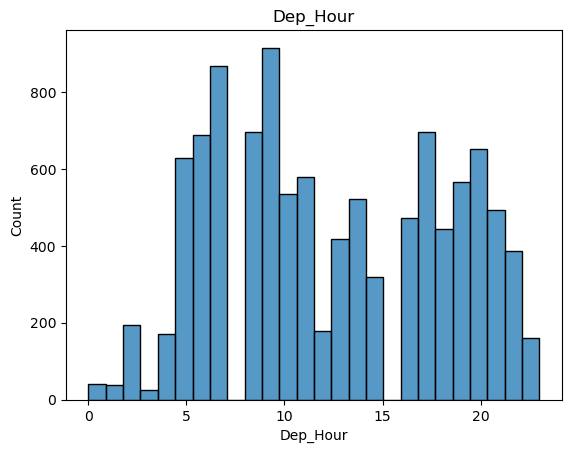

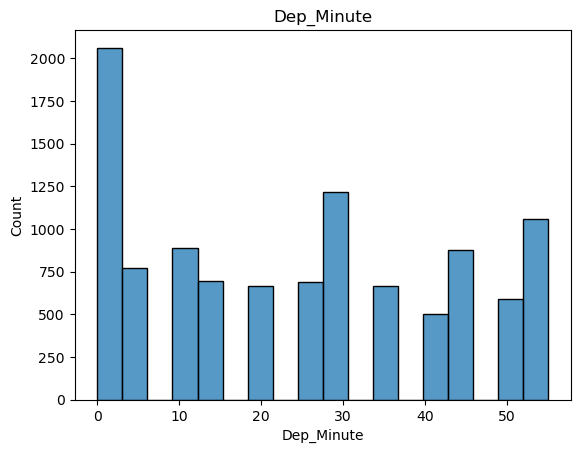

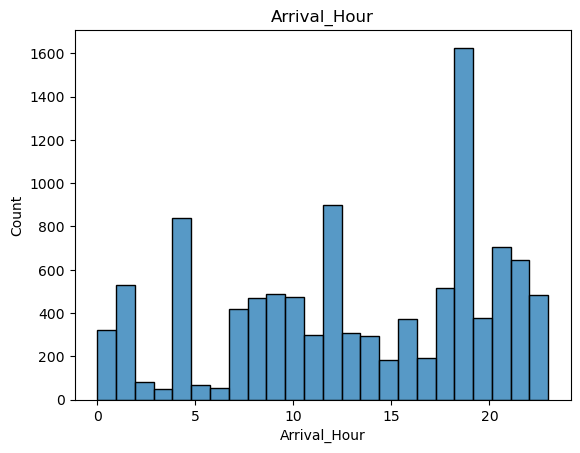

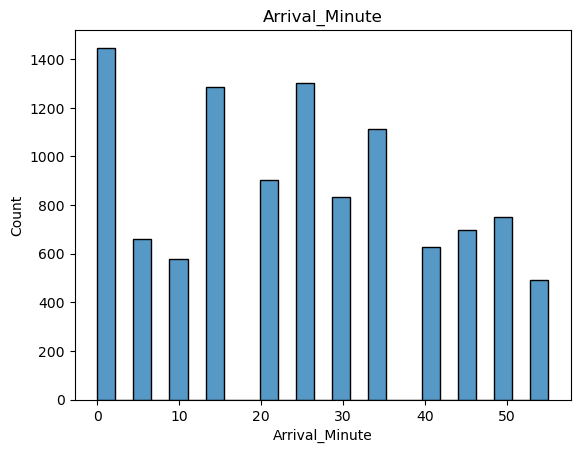

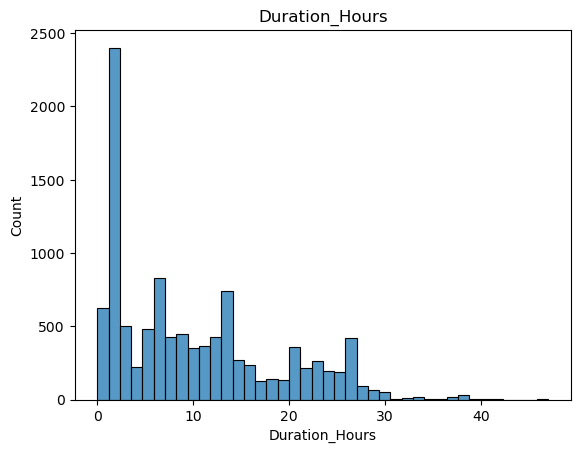

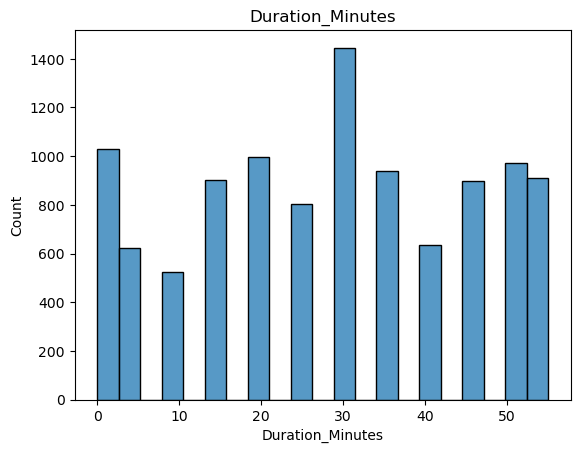

In [23]:
 # Check distribution for numerical features
numerical_features = ['Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 
                      'Arrival_Minute']
for feature in numerical_features:
    sns.histplot(df[feature])
    plt.title(feature)
    plt.show()

<Axes: >

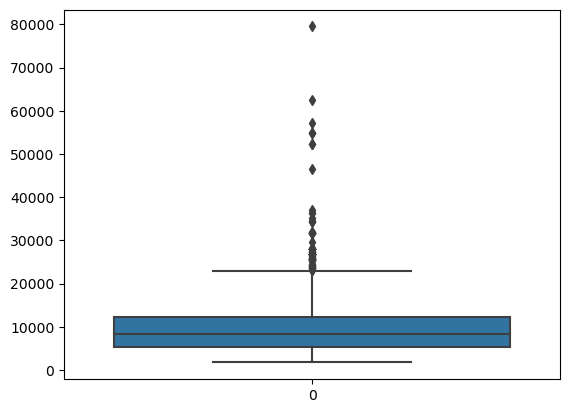

In [32]:
# Create a box plot for a numerical feature
sns.boxplot(df['Price'])

### Bivariate/Multivariate Analysis

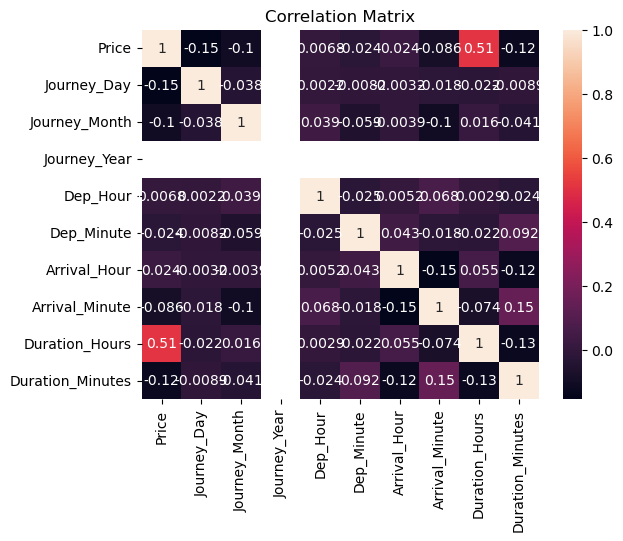

In [33]:
# Check correlation between numerical features
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

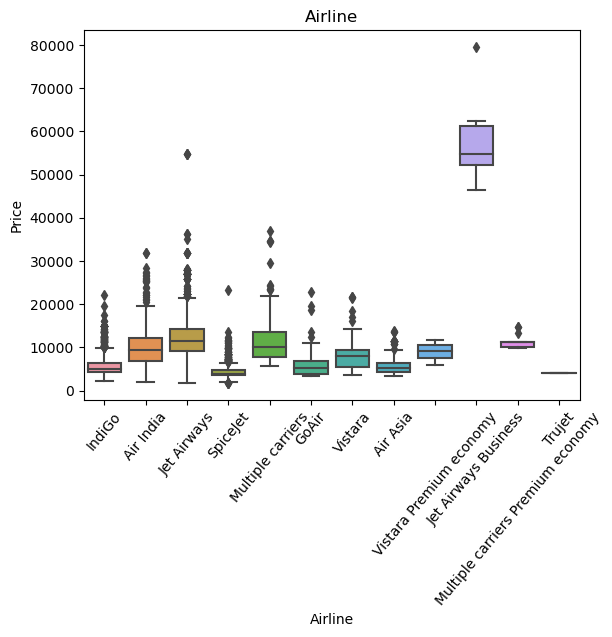

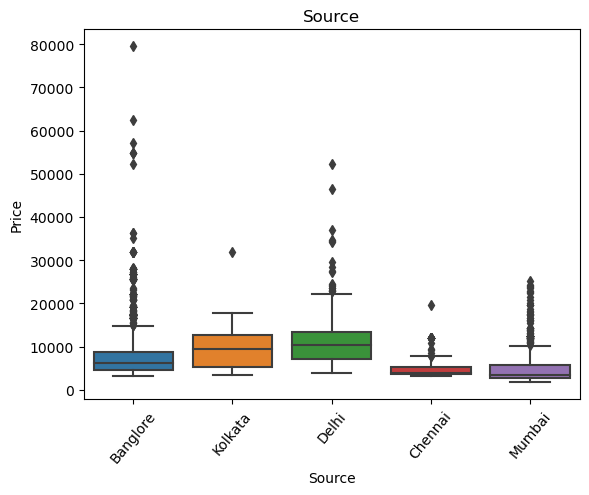

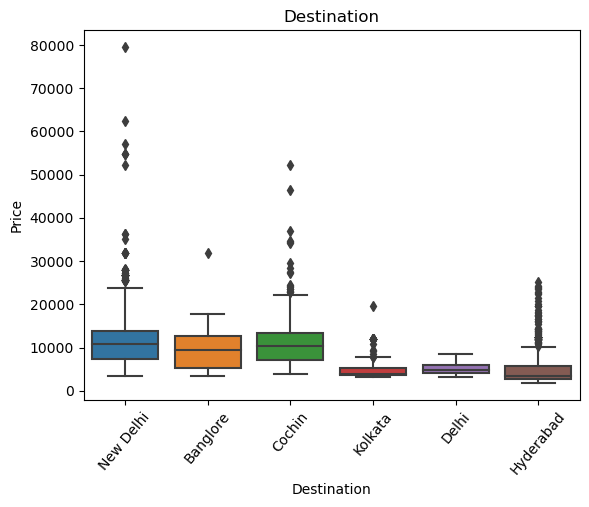

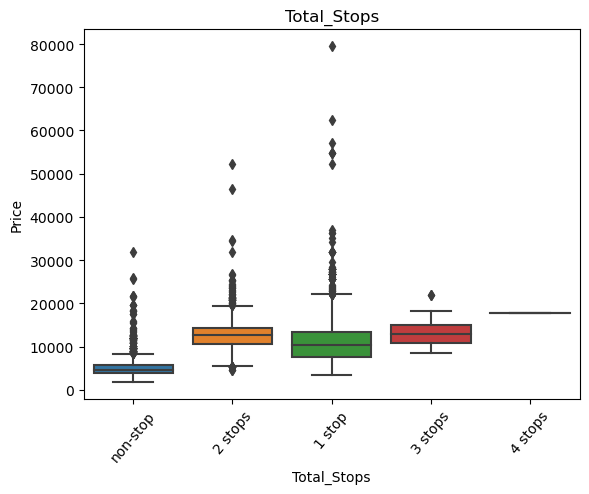

In [41]:
# Check relationship between categorical and numerical features
for feature in categorical_features:
    sns.boxplot(x=feature, y='Price', data=df)
    plt.title(feature)
    plt.xticks(rotation=50)
    plt.show()

### Some analysis questions

In [42]:
 # What is the average price of flight tickets?
average_price = df['Price'].mean()
print('Average Price:', average_price)

Average Price: 9087.21456656057


In [43]:
 # What is the most common airline?
most_common_airline = df['Airline'].value_counts().idxmax()
print('Most Common Airline:', most_common_airline)

Most Common Airline: Jet Airways


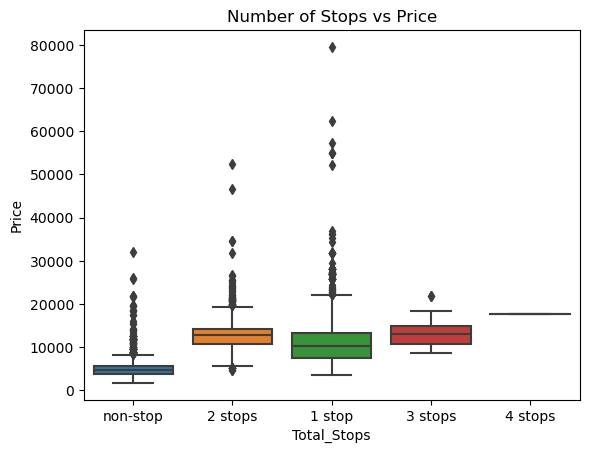

In [44]:
 # What is the relationship between the number of stops and the price of the flight ticket?
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Number of Stops vs Price')
plt.show()

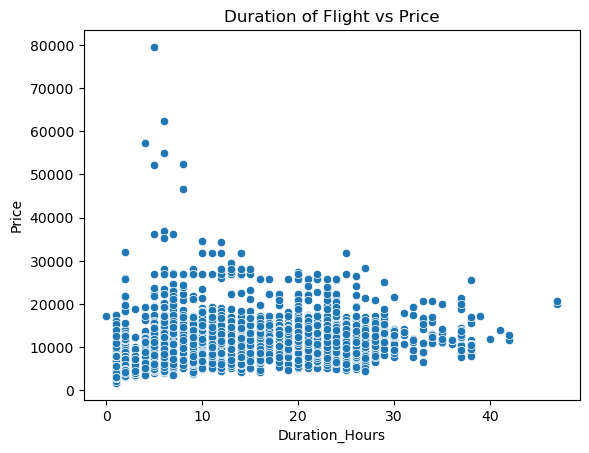

In [45]:
 # What is the relationship between the duration of the flight and the price of the flight ticket?
sns.scatterplot(x='Duration_Hours', y='Price', data=df)
plt.title('Duration of Flight vs Price')
plt.show()

In [ ]:
# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_filename.csv', index=False)